In [1]:
import pandas as pd
import numpy as np

#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split

#Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [2]:
%cd E:\ML2 datasets

E:\ML2 datasets


# Fish_modified dataset

In [3]:
df = pd.read_csv('Fish_modified.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555


In [12]:
from EDA import EDA as eda
eda(df)

First 5 records of dataset:
   Species  Weight   Height   Width  Length
0   Bream   242.0  11.5200  4.0200    78.6
1   Bream   290.0  12.4800  4.3056    81.5
2   Bream   290.0  12.4800  4.3056    81.5
3   Bream   340.0  12.3778  4.6961    81.5
4   Bream   363.0  12.7300  4.4555    88.8
------------------------------------------------------------------------------------------------------------------
Shape of dataset:
 (163, 5)
------------------------------------------------------------------------------------------------------------------
Attributes of dataset:
 ['Species', 'Weight', 'Height', 'Width', 'Length']
------------------------------------------------------------------------------------------------------------------
Info of dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  163 non-null    object 
 1   Weight   163 non-null   

# Combine the three Length attributes into a single attribute

In [5]:
df["Length"] = df["Length1"]+ df["Length2"]+df["Length3"]

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Length
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,78.6
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,81.5
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,81.5
3,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,81.5
4,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,88.8


In [7]:
df = df.drop(["Length1","Length2","Length3"], axis=1)

In [8]:
df.head()

,Species,Weight,Height,Width,Length
0,Bream,242.0,11.5200,4.0200,78.6
1,Bream,290.0,12.4800,4.3056,81.5
2,Bream,290.0,12.4800,4.3056,81.5
3,Bream,340.0,12.3778,4.6961,81.5
4,Bream,363.0,12.7300,4.4555,88.8


# Visualize the dataset scatter by species using Matplotlib/Seaborn/Plotly

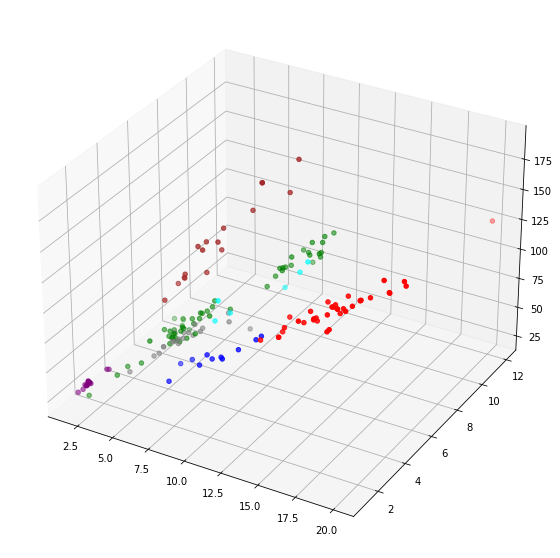

In [9]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
x = df['Height']
y = df['Width']
z = df['Length']
colors={"Bream":'red','Parkki' :'blue', 'Perch':'green','Pike':'brown','Roach':'grey','Smelt':'purple','Whitefish':'cyan'}
ax.scatter3D(x,y,z, c=df["Species"].apply(lambda x: colors[x])) #,cmap='plasma'

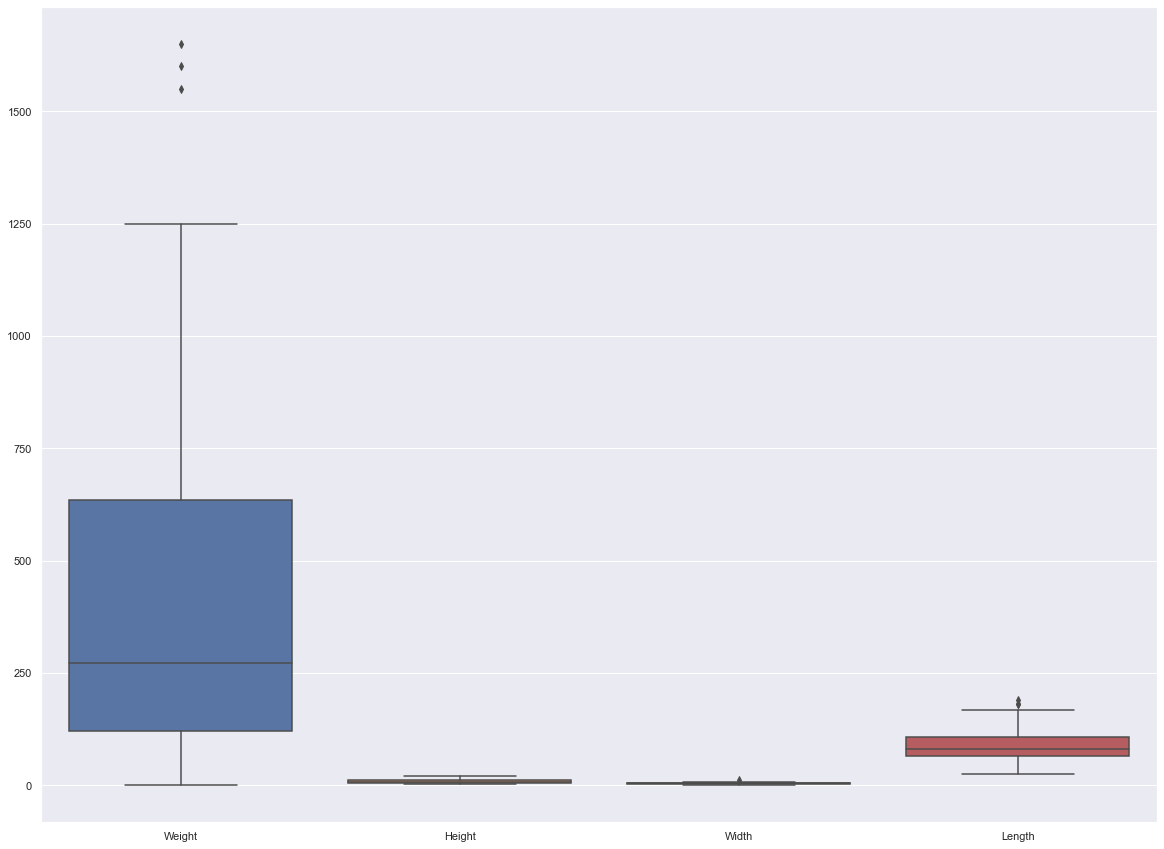

In [10]:
sns.set()
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.show()

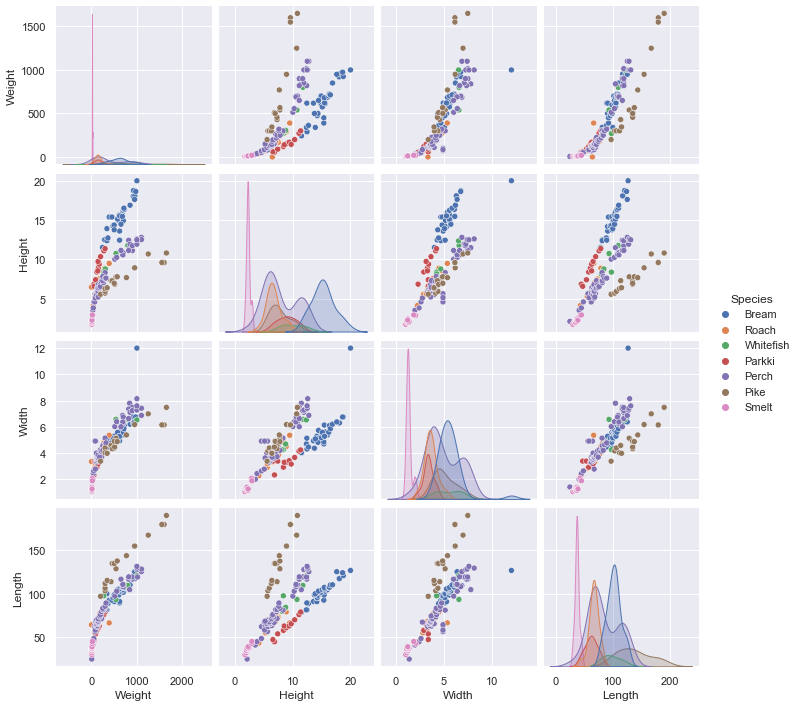

In [13]:
sns.set_theme(style="darkgrid")
sns.pairplot(df, hue ="Species")

{'whiskers': [<matplotlib.lines.Line2D at 0x226ff6bcdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x226ff6c7310>,
 'boxes': [<matplotlib.lines.Line2D at 0x226ff6bca90>],
 'medians': [<matplotlib.lines.Line2D at 0x226ff6c78b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226ff6c7be0>],
 'means': []}

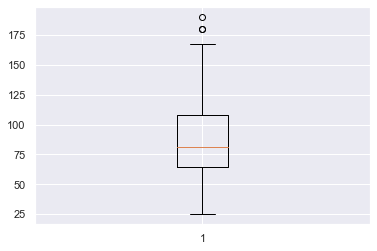

In [14]:
plt.boxplot(df["Length"])    #iloc[:,2:5]

# Identify outliers using various techniques

In [15]:
print(df['Length'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
print(df['Width'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
print(df['Height'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

0.0     24.700
0.1     43.500
0.2     62.500
0.3     66.076
0.4     71.980
0.5     81.500
0.6     95.440
0.7    104.680
0.8    111.500
0.9    125.580
1.0    190.400
Name: Length, dtype: float64
0.0     1.04760
0.1     2.10736
0.2     3.33564
0.3     3.62520
0.4     4.01484
0.5     4.33500
0.6     4.87520
0.7     5.28010
0.8     6.11436
0.9     6.74600
1.0    12.00000
Name: Width, dtype: float64
0.0     1.738800
0.1     3.587200
0.2     5.637480
0.3     6.283040
0.4     6.951060
0.5     7.786000
0.6     9.627280
0.7    11.416160
0.8    12.679600
0.9    15.427593
1.0    20.000000
Name: Height, dtype: float64


# 1.5 IQR for specific attribute, full dataset

In [18]:
from Outliers1 import identifyoutlier
identifyoutlier(df['Length'])

IQR:
 3.6999999999999957
------------------------------------------------------------------------------------------------------------------
outindex values:
 0      False
1      False
2      False
3      False
4      False
       ...  
158     True
159     True
160     True
161    False
162    False
Name: Length, Length: 163, dtype: bool
------------------------------------------------------------------------------------------------------------------
lowerlimit is:
 21.75000000000001
upperlimit is:
 36.55
------------------------------------------------------------------------------------------------------------------
Number of outliers are:
 156


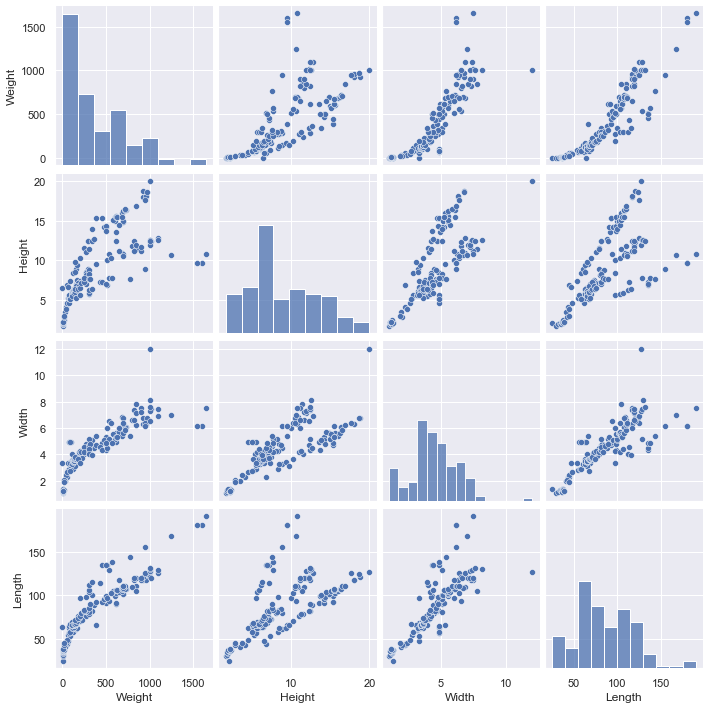

In [19]:
sns.pairplot(df)

# (2.5 * std. deviation) for specific attribute, full dataset

In [20]:
from numpy import mean
from numpy import std

In [21]:
from Outliers2 import stdoutlier
stdoutlier(df["Length"])

groups_mean:
 86.06590457134969
groups_std:
 32.01260521774803
------------------------------------------------------------------------------------------------------------------
lowerlimit is:
 6.034391526979604
upperlimit is:
 166.0974176157198
------------------------------------------------------------------------------------------------------------------
Number of outliers are:
 4


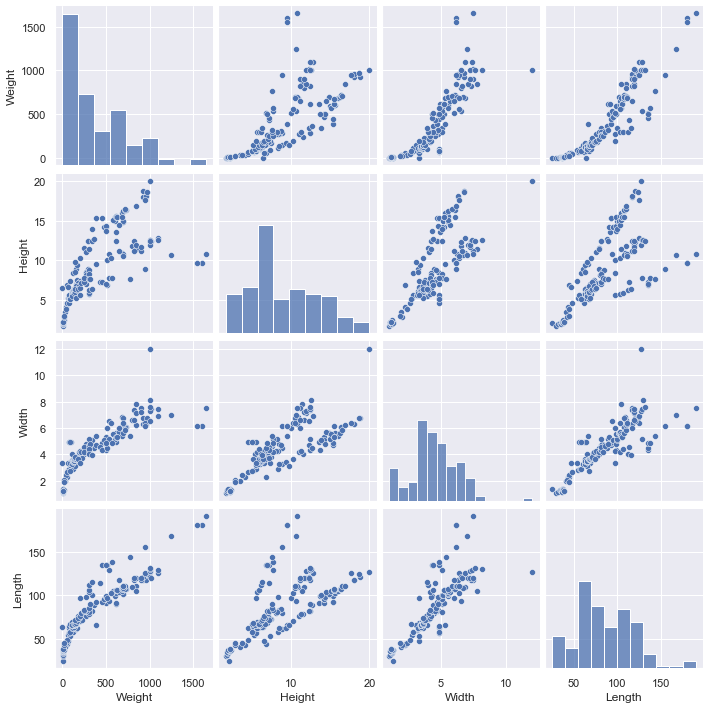

In [22]:
sns.pairplot(df)

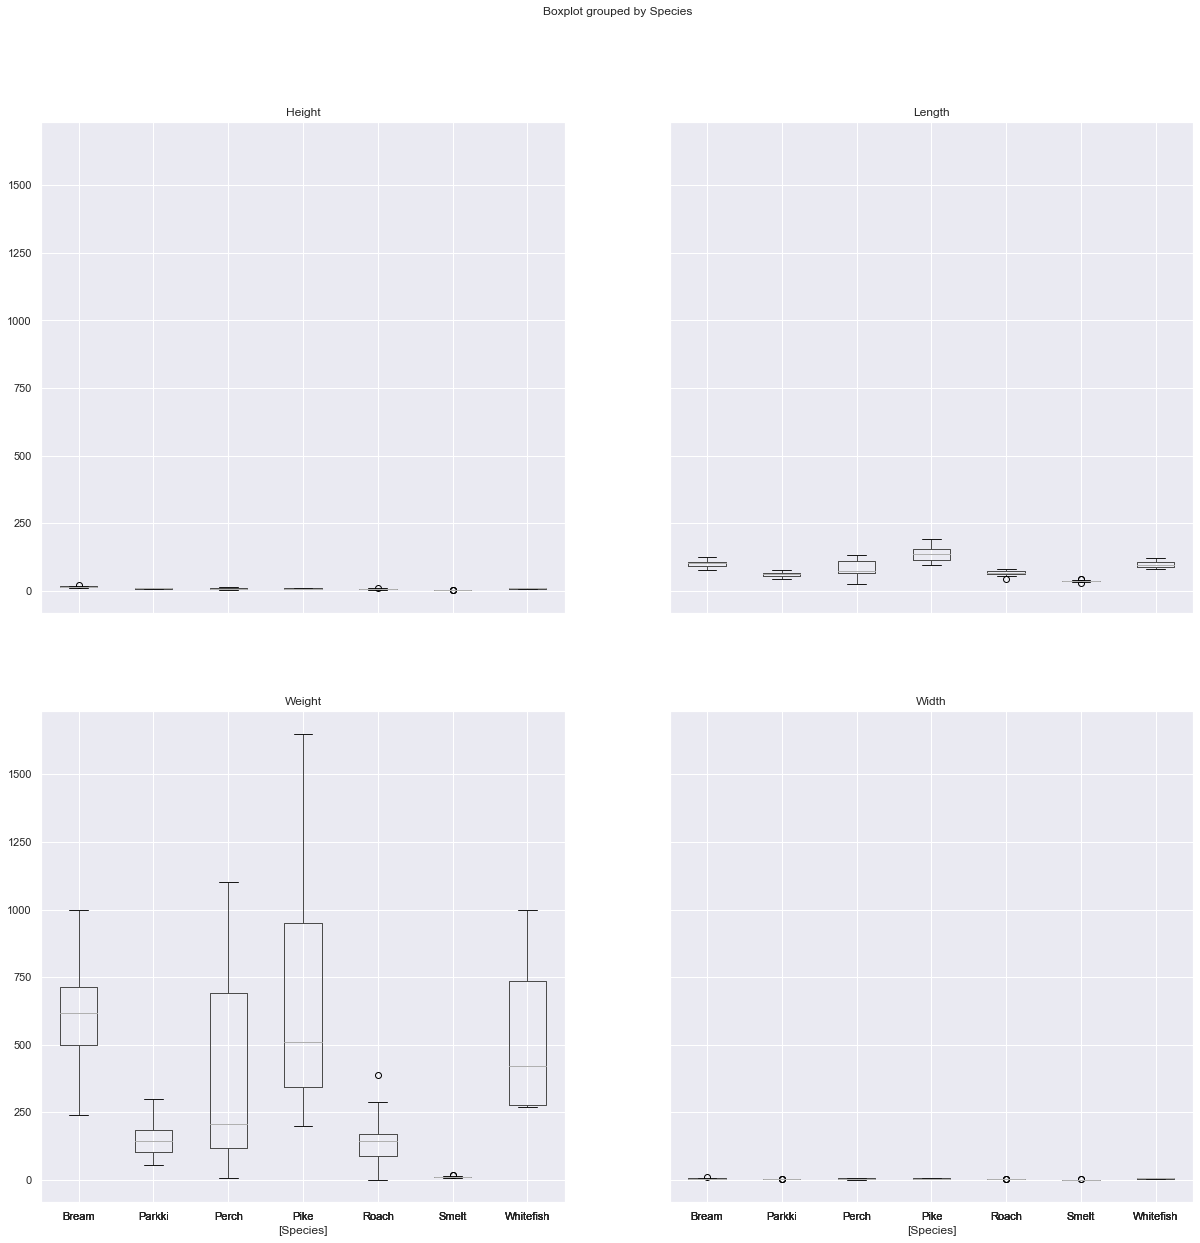

In [23]:
plot = df.boxplot(by = 'Species', figsize=(20,20)) #,column=['Weight','Heigth']